In [37]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

op = os.path.join

In [38]:
DATA_DIR = "./frames/"

In [39]:
files = os.listdir(DATA_DIR)
print(len(files))   

21


In [40]:
test_img1 = cv.imread(op(DATA_DIR, files[0]))
test_img1 = cv.cvtColor(test_img1, cv.COLOR_BGR2GRAY)

test_img2 = cv.imread(op(DATA_DIR, files[1]))
test_img2 = cv.cvtColor(test_img2, cv.COLOR_BGR2GRAY)

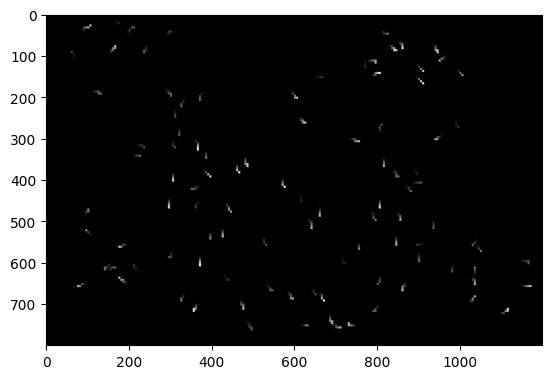

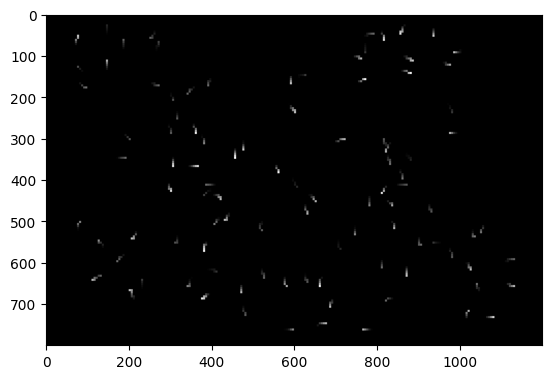

In [41]:
plt.imshow(test_img1, cmap='gray')
plt.show()

plt.imshow(test_img2, cmap='gray')
plt.show()

## **Connected Component Labeling**

In [42]:
def find_frame(a, parent):
    if a == parent[a]:
        return a
    parent[a] = find_frame(parent[a], parent)
    return parent[a]

In [43]:
def ccl(frame):
    n = len(frame)
    m = len(frame[0])
    # dxy = [[-1, 0], [0, -1]] <- 4
    dxy = [[-1, 0], [0, -1], [-1, -1], [-1, 1]]
    parent = [0]
    cnt = 1
    res = frame.copy()
    for i in range(n):
        for j in range(m):
            res[i][j] = 0
            if frame[i][j] == 0:
                continue
            a = []
            for p in dxy:
                ni = i + p[0]
                nj = j + p[1]
                if(0 <= ni and ni < n and 0 <= nj and nj < m and res[ni][nj] != 0):
                    a.append(res[ni][nj])
            if len(a) == 0:
                parent.append(cnt)
                res[i][j] = cnt
                cnt += 1
            else:
                res[i][j] = min(a)
                for p in a:
                    pa = find_frame(p, parent)
                    pb = find_frame(res[i][j], parent)
                    if(pa > pb) :
                        pa, pb = pb, pa
                    parent[pb] = pa
    component_cnt = [0 for i in range(len(parent))]
    cnt = 1
    for i in range(1, len(parent)):
        if component_cnt[find_frame(i, parent)] == 0:
            component_cnt[find_frame(i, parent)] = cnt
            cnt += 1
        component_cnt[i] = component_cnt[find_frame(i, parent)]
    for i in range(n):
        for j in range(m):
            if frame[i][j] != 0:
                res[i][j] = component_cnt[res[i][j]] 
    return res 

In [44]:
ccl_image1 = ccl(test_img1)
print(ccl_image1.max())

ccl_image2 = ccl(test_img2)
print(ccl_image2.max())

95
98


In [45]:
def show_labeled_image(img):
    # different random colors for each label
    cmap = plt.cm.get_cmap('tab20', img.max())
    plt.imshow(img, cmap=cmap)
    plt.show()

/var/folders/w2/g11x7cpj7blf4j3f7ldsffqc0000gn/T/ipykernel_34940/2206722284.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', img.max())


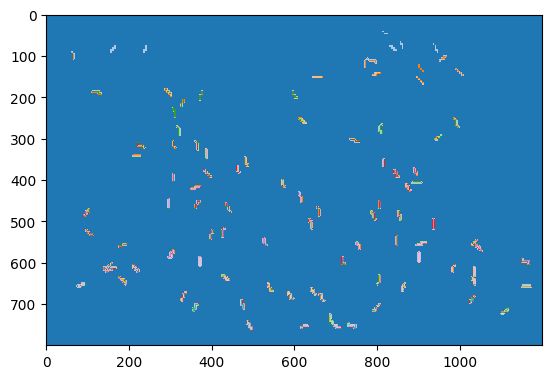

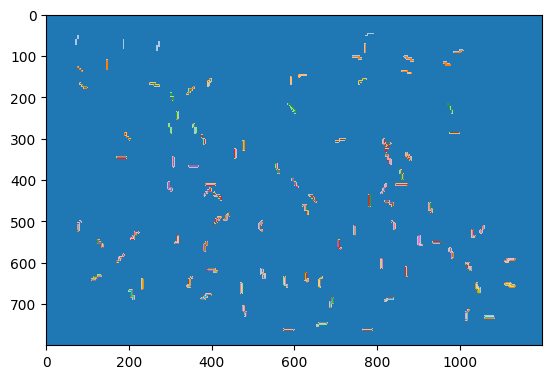

In [46]:
show_labeled_image(ccl_image1)
show_labeled_image(ccl_image2)

In [47]:
# ccl_image1 to txt file
with open('ccl_image1.txt', 'w') as f:
    for i in range(len(ccl_image1)):
        for j in range(len(ccl_image1[0])):
            f.write(str(ccl_image1[i][j]) + ' ')
        f.write('\n')

In [48]:
# ccl_image2 to txt file
with open('ccl_image2.txt', 'w') as f:
    for i in range(len(ccl_image2)):
        for j in range(len(ccl_image2[0])):
            f.write(str(ccl_image2[i][j]) + ' ')
        f.write('\n')

In [49]:
print(ccl_image1.shape, ccl_image2.shape)

(800, 1200) (800, 1200)
